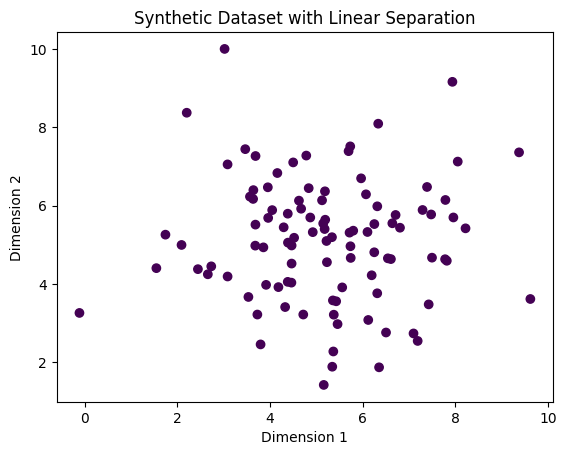

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: False

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

num_instances = 100
num_dimensions = 10

#X = np.random.randn(num_instances, num_dimensions)
X = np.random.normal(loc=5, scale=np.sqrt(3), size=(num_instances, num_dimensions))
weights = np.random.uniform(-2, 2, num_dimensions)
ran_bias = np.random.uniform(-2, 2)
y = np.dot(X, weights) > ran_bias

# Plot the synthetic dataset in 2D (using the first two dimensions)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Synthetic Dataset with Linear Separation")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

full_model = LogisticRegression(solver='lbfgs', max_iter=100000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
full_model.fit(X_train, y_train)

predict_y = full_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predict_y)}")

probas = full_model.predict_proba(X_test)[:, 1]
full_model_auc = roc_auc_score(y_test, probas)
print(f"ROC AUC: {full_model_auc}")

